# 도전학기 '빅데이터와 인공지능을 활용한 시스템 강건설계' 데이터 챌런지!

#### - 데이터 챌런지 목표 
: 많은 양의 데이터(빅데이터)에서 필요한 정보만 추출(인덱싱)하고, 원하는 형태로 가공할 수 있는 데이터 핸들링 수행능력 평가

#### - 가이드에 따라 총 4단계의 데이터 챌런지를 수행하며, 각 단계의 결과값(csv 형태의 데이터 파일)을 1개 압축파일(.zip)로 제출
- 과제 수행을 위해 최소한 가이드가 있으나 가이드에 따르지 않고 다른 방법으로 코드 작성해도 결과만 맞으면 무관

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### - 데이터 출처
- 베어링 마모 상태에 따라 수집된 센서데이터

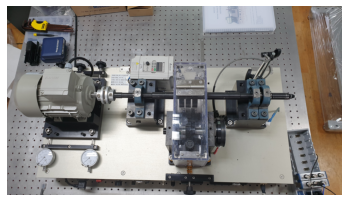

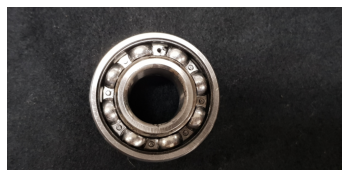

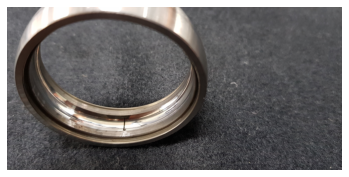

In [2]:
Simulator = plt.imread('./DataReference/Simulator.jpg')
plt.imshow(Simulator)
plt.axis('off')
plt.show()

Bearing = plt.imread('./DataReference/Bearing.jpg')
plt.imshow(Bearing)
plt.axis('off')
plt.show()

OuterRingFault = plt.imread('./DataReference/OuterRingFault.jpg')
plt.imshow(OuterRingFault)
plt.axis('off')
plt.show()

DataFrame 행,열 생략 방지

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',   5000)

# 데이터 불러오기

### Process 및 Record 데이터 불러오기 (Normal, Abnormal 각 1개씩)

In [4]:
NormalProcess   = pd.read_csv('./Data/NormalProcess')
AbnormalProcess = pd.read_csv('./Data/AbnormalProcess')

NormalRecord   = pd.read_csv('./Data/NormalRecord',   header = None, dtype = 'int64')
AbnormalRecord = pd.read_csv('./Data/AbnormalRecord', header = None, dtype = 'int64')

### Process 데이터 살펴보기
[NormalProcess / AbnormalProcess]

0열 : 시간열 (s) - Hz = 20000

1열 : x 방향 가속도

2열 : y 방향 가속도

In [5]:
NormalProcess

,time,x_acc,y_acc
0,0.00000,0.385451,-0.116455
1,0.00005,-0.001705,-0.072191
2,0.00010,0.025332,-0.024551
3,0.00015,0.512375,-0.128459
4,0.00020,0.159016,0.003958
...,...,...,...
35499995,1774.99975,0.052369,-0.288260
35499996,1774.99980,0.043732,-0.065439
35499997,1774.99985,0.107570,-0.085695
35499998,1774.99990,0.146248,-0.181726


### Record 데이터 살펴보기
[NormalRecord / AbnormalRecord]

데이터 수집 중 공정 수행(장비 작동)이 정지되었던 시간(break time)을 기록한 데이터

0열 : "작동 정지" 시작 시간(s)

1열 : "작동 정지" 끝 시간(s, 장비 작동 시작 시간)

In [70]:
NormalRecord

,0,1
0,39,42
1,53,60
2,143,152
3,170,175
4,233,240
5,245,253
6,305,312
7,382,390
8,417,426
9,463,466


In [6]:
AbnormalRecord

,0,1
0,51,54
1,100,110
2,126,132
3,151,156
4,170,177
5,195,198
6,223,231
7,311,317
8,338,340
9,454,459


.

.

.



# [1단계] 공정 데이터(Process) & 기록 데이터(Record) 데이터 인덱싱 (10점)

## 실제로 공정이 수행되고 있는 데이터만 추출 (장비가 작동 중인 데이터)

Record 데이터 time에 맞게 Process 데이터 내 필요한 데이터 추출

추출된 데이터는 모두 이어붙여 하나의 NormalData 및 AbnormalData로 변환

#### [필수] 추출 후 데이터 이름(변수명) : 
- NormalData
- AbnormalData

! 힌트 : np.where함수를 사용할 경우 처음 데이터와 마지막 데이터는 for 구문 밖에서 직접 인덱싱하는 것이 편리함

In [68]:
# Normal 데이터 인덱싱 코드 작성
FirstDataStartPoint_Normal = np.where(NormalProcess['time']==NormalRecord.iloc[:,0][0])


NormalData = NormalProcess[:FirstDataStartPoint_Normal[0][0]]


for i in range(NormalRecord.shape[0]-1):
    FirstDataStartPoint_Normal = np.where(NormalProcess['time']==NormalRecord.iloc[:,0][i+1])[0][0]
    EndDataStartPoint_Normal   = np.where(NormalProcess['time']==NormalRecord.iloc[:,1][i])[0][0]
    
    
    tempdata = NormalProcess[EndDataStartPoint_Normal:FirstDataStartPoint_Normal]
    
    NormalData = pd.concat([NormalData,tempdata])
    
EndDataStartPoint_Normal   = np.where(NormalProcess['time']==NormalRecord.iloc[:,1][NormalRecord.shape[0]-1])[0][0]
tempdata = NormalProcess[EndDataStartPoint_Normal:]
NormalData=pd.concat([NormalData,tempdata])

In [69]:
NormalData

,time,x_acc,y_acc
0,0.00000,0.385451,-0.116455
1,0.00005,-0.001705,-0.072191
2,0.00010,0.025332,-0.024551
3,0.00015,0.512375,-0.128459
4,0.00020,0.159016,0.003958
...,...,...,...
35499995,1774.99975,0.052369,-0.288260
35499996,1774.99980,0.043732,-0.065439
35499997,1774.99985,0.107570,-0.085695
35499998,1774.99990,0.146248,-0.181726


In [72]:
# Abnormal 데이터 인덱싱 코드 작성
# Normal 데이터 인덱싱 코드 작성
FirstDataStartPoint_Normal = np.where(AbnormalProcess['time']==AbnormalRecord.iloc[:,0][0])


AbnormalData = AbnormalProcess[:FirstDataStartPoint_Normal[0][0]]


for i in range(AbnormalRecord.shape[0]-1):
    FirstDataStartPoint_Normal = np.where(AbnormalProcess['time']==AbnormalRecord.iloc[:,0][i+1])[0][0]
    EndDataStartPoint_Normal   = np.where(AbnormalProcess['time']==AbnormalRecord.iloc[:,1][i])[0][0]
    
    
    tempdata = AbnormalProcess[EndDataStartPoint_Normal:FirstDataStartPoint_Normal]
    
    AbnormalData = pd.concat([AbnormalData,tempdata])
    
EndDataStartPoint_Normal   = np.where(AbnormalProcess['time']==AbnormalRecord.iloc[:,1][AbnormalRecord.shape[0]-1])[0][0]
tempdata = AbnormalProcess[EndDataStartPoint_Normal:]
AbnormalData=pd.concat([AbnormalData,tempdata])



AbnormalData

,time,x_acc,y_acc
0,0.00000,-0.136515,0.061351
1,0.00005,-0.083943,-0.343402
2,0.00010,0.128223,-0.917710
3,0.00015,0.610009,-0.290510
4,0.00020,0.383574,0.443973
...,...,...,...
33259995,1662.99975,-0.581876,0.508118
33259996,1662.99980,0.113954,0.137876
33259997,1662.99985,0.552180,0.014461
33259998,1662.99990,-0.005836,-0.122832


In [73]:
NormalData.shape, AbnormalData.shape

((30000000, 3), (30000000, 3))

.

.

.



### 1단계 결과물 제출용 데이터 파일로 저장 (수강생 번호 외 코드수정X)

- 위에서 데이터 이름(변수명) 가이드에 맞게 지정됐는지 재확인 요망

In [74]:
StudentNo = 414   # 수강생 번호 입력

# 아래는 수정 금지
NormalShape   = pd.DataFrame(NormalData.shape)
AbnormalShape = pd.DataFrame(AbnormalData.shape)


Path1 = './Result/ST%d_DC1_1'%StudentNo
Path2 = './Result/ST%d_DC1_2'%StudentNo

NormalShape.to_csv(  Path1 , sep=',' , header=None , index=None)
AbnormalShape.to_csv(Path2 , sep=',' , header=None , index=None)

.

.

.



# [2단계] Normal / Abnormal 데이터 분할 (10점)

## 각 데이터를 10초 단위로 분할

(시작을 1초로 가정할 시)

NormalData의 1~10초  -> Normal_1

NormalData의 11~20초 -> Normal_2

NormalData의 21~30초 -> Normal_3

              .
              .
              .


#### [필수] 분할 후 데이터 이름(변수명) : 
- Normal_1~n
- Abnormal_1~n

In [75]:
# 데이터 분할을 위한 시간열 재생성 (코드 수정 x)
Hz = 20000

NormalData_time   = np.arange(0, NormalData.shape[0]/Hz,   1/Hz)
AbnormalData_time = np.arange(0, AbnormalData.shape[0]/Hz, 1/Hz)

NormalData.iloc[:,0]   = NormalData_time
AbnormalData.iloc[:,0] = AbnormalData_time

NormalData.columns   = ['time', 'x_acc', 'y_acc']
AbnormalData.columns = ['time', 'x_acc', 'y_acc']

In [86]:
NoOfData   = round(NormalData.iloc[-1, 0]/10)
NoOfData

150

In [87]:
NormalData.shape

(30000000, 3)

In [88]:
NormalData.iloc[-1, 0]

1499.9999500000001

In [91]:
# 데이터 분할 코드 작성

# 생성될 데이터 갯수 정의
NoOfData   = round(NormalData.iloc[-1, 0]/10)

for i in range(NoOfData-1):   # 마지막 데이터는 직접 생성해야 함 -> NoOfData-1 범위로 for 구문 작성
    
    
    StartPoint1=np.where(NormalData.iloc[:,0].values == (i)*10)[0][0]
    StartPoint2 = np.where(NormalData.iloc[:,0].values == (i+1)*10)[0][0]
    
    s1 = 'Normal_%d = NormalData.iloc[StartPoint1:StartPoint2, :]'%(i+1)
    exec(s1)
    
    
    s2 = 'Abnormal_%d = AbnormalData.iloc[StartPoint1:StartPoint2, :]'%(i+1)
    exec(s2)


# 마지막 데이터 생성
StartPoint1 = np.where(NormalData.iloc[:,0].values == (i+1)*10)[0][0]
s3 = 'Normal_%d = NormalData.iloc[StartPoint1:, :]'%(NoOfData)
exec(s3)

StartPoint2 = np.where(NormalData.iloc[:,0].values == (i+1)*10)[0][0]
s4 = 'Abnormal_%d = AbnormalData.iloc[StartPoint2:, :]'%(NoOfData)
exec(s4)

.

.

.



### 2단계 결과물 제출용 데이터 파일로 저장 (수강생 번호 외 코드수정X)

- 위에서 데이터 이름(변수명) 가이드에 맞게 지정됐는지 재확인 요망

In [95]:
Normal_150

,time,x_acc,y_acc
35220000,1490.00000,0.061382,-0.078568
35220001,1490.00005,0.026834,-0.082319
35220002,1490.00010,0.237498,-0.180601
35220003,1490.00015,0.064386,-0.103326
35220004,1490.00020,0.020075,-0.060187
...,...,...,...
35499995,1499.99975,0.052369,-0.288260
35499996,1499.99980,0.043732,-0.065439
35499997,1499.99985,0.107570,-0.085695
35499998,1499.99990,0.146248,-0.181726


In [92]:
StudentNo = 414   # 수강생 번호 입력

Path1 = './Result/ST%d_DC2_1'%StudentNo
Path2 = './Result/ST%d_DC2_2'%StudentNo


Normal_150.to_csv(  Path1 , sep=',' , header=None , index=None)
Abnormal_150.to_csv(Path2 , sep=',' , header=None , index=None)

.

.

.



# 3단계 데이터 특징 추출 (5점)

2단계에서 추출한 데이터에 대하여 각 센서(열) 별로 아래 10개 특징값 순서대로 추출 (time domain만 추출! / frequency domain X)
- Max, Min, Mean, RMS, Variance, Skewness, Kurtosis, Crest factor, Impulse factor, Shape factor 순서대로

In [96]:
import scipy.stats as sp

def rms(x): # RMS 함수 정의
    return np.sqrt(np.mean(x**2))


#### [필수] 추출 후 특징데이터 (총 2개) 이름(변수명) : 
- (Normal 특징데이터) Feature_Normal
- (Abnormal 특징데이터) Feature_Abnormal

In [104]:
# 특징데이터 크기 지정
NoOfSensor  = 2
NoOfFeature = 10

Feature_Normal   = np.zeros((NoOfSensor*NoOfFeature , NoOfData))
Feature_Abnormal = np.zeros((NoOfSensor*NoOfFeature , NoOfData))



# 특징추출 코드 작성
for i in range(NoOfData):
    s1 = 'temp_data1=Normal_%d'%(i+1)
    exec(s1)
    s2 = 'temp_data2=Abnormal_%d'%(i+1)
    exec(s2)
    
    
    for j in range(NoOfSensor):
        Feature_Normal[10*j+0, i] = np.max(temp_data1.iloc[:,j+1])
        Feature_Normal[10*j+1, i] = np.min(temp_data1.iloc[:,j+1])
        Feature_Normal[10*j+2, i] = np.mean(temp_data1.iloc[:,j+1])
        Feature_Normal[10*j+3, i] = rms(temp_data1.iloc[:,j+1])
        Feature_Normal[10*j+4, i] = np.var(temp_data1.iloc[:,j+1])
        Feature_Normal[10*j+5, i] = sp.skew(temp_data1.iloc[:,j+1])
        Feature_Normal[10*j+6, i] = sp.kurtosis(temp_data1.iloc[:,j+1])
        Feature_Normal[10*j+7, i] = np.max(temp_data1.iloc[:,j])/rms(temp_data1.iloc[:,j+1])
        Feature_Normal[10*j+8, i] = rms(temp_data1.iloc[:,j])/np.mean(temp_data1.iloc[:,j+1])
        Feature_Normal[10*j+9, i] = np.max(temp_data1.iloc[:,j])/np.mean(temp_data1.iloc[:,j+1])
        
        Feature_Abnormal[10*j+0, i] = np.max(temp_data2.iloc[:,j+1])
        Feature_Abnormal[10*j+1, i] = np.min(temp_data2.iloc[:,j+1])
        Feature_Abnormal[10*j+2, i] = np.mean(temp_data2.iloc[:,j+1])
        Feature_Abnormal[10*j+3, i] = rms(temp_data2.iloc[:,j+1])
        Feature_Abnormal[10*j+4, i] = np.var(temp_data2.iloc[:,j+1])
        Feature_Abnormal[10*j+5, i] = sp.skew(temp_data2.iloc[:,j+1])
        Feature_Abnormal[10*j+6, i] = sp.kurtosis(temp_data2.iloc[:,j+1])
        Feature_Abnormal[10*j+7, i] = np.max(temp_data2.iloc[:,j])/rms(temp_data2.iloc[:,j+1])
        Feature_Abnormal[10*j+8, i] = rms(temp_data2.iloc[:,j])/np.mean(temp_data2.iloc[:,j+1])
        Feature_Abnormal[10*j+9, i] = np.max(temp_data2.iloc[:,j])/np.mean(temp_data2.iloc[:,j+1])
        
        
        
print(Feature_Normal.shape)
print(Feature_Abnormal.shape)

(20, 150)
(20, 150)


.

.

.



### Data frame 형식으로 변환 및 데이터 확인 (코드수정x)

In [106]:
Feature_Normal_df = pd.DataFrame(Feature_Normal)
Feature_Normal_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
0,1.546920,1.908916,2.373429,2.004297,1.680228,1.427506,1.367799,1.504487,1.575459,1.114702,1.360664,1.137608,1.303961,1.376811,1.958109,1.484584,1.603623,1.416241,1.160139,2.023073,1.276549,1.334003,1.244255,2.000542,1.464306,1.495099,1.316353,1.346395,1.277300,1.486086,1.772604,2.167271,1.781617,1.469939,1.478201,1.934827,1.607002,1.424126,1.330248,1.438771,1.623149,2.058371,1.849585,1.370803,1.560814,1.572830,1.603998,1.449286,1.700130,1.651689,1.648684,1.881879,1.417367,1.412485,2.149997,1.248010,1.355407,1.223226,1.366297,1.279177,1.377938,1.101934,1.342640,1.880377,1.356909,1.101934,1.767347,1.263030,1.723412,1.228107,1.305088,1.395587,1.413987,1.875120,1.278051,1.183421,1.242752,1.665207,1.374934,1.391832,1.407979,1.561565,1.464306,1.511621,1.436894,1.461678,1.545793,1.628782,1.789127,1.314100,2.239370,1.639672,1.499229,1.329872,1.535279,1.154506,1.479327,1.315978,1.558185,1.438396,1.270916,1.183797,1.048611,1.515752,1.649435,1.431261,1.270916,1.899904,1.507491,1.732049,1.622023,1.561940,1.555557,1.475947,1.694122,1.268288,1.511246,1.169903,1.312223,1.681354,1.389579,2.004673,1.645305,1.621272,1.524389,1.587475,1.904410,1.583720,1.340011,1.668587,1.634790,1.311472,1.323488,1.299455,1.432763,1.340386,1.109069,1.745567,1.152253,1.289316,1.442151,1.589353,1.543916,1.715151,1.313349,1.223977,1.493221,1.631411,1.773731,1.524013
1,-1.403503,-1.555211,-1.835721,-1.683262,-1.104218,-0.996445,-1.115107,-0.866141,-0.997571,-0.905945,-1.173312,-0.910076,-1.068168,-1.240530,-1.211615,-1.306620,-1.730952,-1.143271,-0.972412,-2.035871,-1.111352,-1.379470,-1.225509,-1.192464,-1.059156,-1.264563,-1.004706,-1.504892,-1.034747,-1.429414,-2.511648,-1.207484,-1.693776,-0.963775,-1.200349,-1.448940,-1.888669,-1.530052,-1.257803,-1.050519,-1.286718,-1.905567,-1.539815,-1.070797,-1.199974,-1.281461,-1.029490,-1.161671,-1.469594,-1.334033,-1.585628,-2.068165,-1.214995,-1.015596,-1.623931,-1.074927,-1.214619,-0.829340,-1.098960,-1.480108,-1.168055,-0.797422,-1.045637,-1.392989,-1.404254,-1.148153,-1.436173,-1.122993,-1.046013,-1.000951,-1.075678,-0.887545,-1.122993,-1.224758,-0.986681,-0.889047,-0.764001,-2.257049,-0.834598,-1.082438,-0.951383,-1.750855,-1.018225,-1.276955,-0.904819,-1.020853,-1.279959,-1.350180,-1.282587,-1.186080,-1.927722,-1.340417,-1.289722,-1.007710,-1.370833,-1.136887,-1.300612,-1.226635,-1.119238,-1.120740,-1.147777,-0.903317,-0.733209,-1.146651,-0.978420,-1.388107,-1.050143,-1.792161,-1.834595,-2.110974,-1.845860,-1.064413,-1.112854,-1.726446,-1.498884,-1.401250,-1.038878,-1.086193,-1.081687,-1.165051,-1.271322,-1.408009,-1.472222,-1.294979,-1.395993,-1.424907,-1.210113,-1.103842,-0.957767,-1.139516,-1.306245,-1.087319,-1.070421,-1.417022,-1.169933,-1.006959,-1.017474,-1.011841,-0.999073,-1.649466,-0.972036,-1.044135,-1.267191,-1.582248,-0.795920,-1.030617,-1.002453,-2.023479,-1.495504,-1.213492
2,0.138501,0.131867,0.128184,0.123096,0.120492,0.119590,0.116831,0.117421,0.117198,0.115114,0.114741,0.117236,0.115761,0.116763,0.119092,0.120982,0.121713,0.123035,0.121669,0.125581,0.125175,0.126610,0.124528,0.125827,0.126646,0.126363,0.127312,0.127549,0.131035,0.127975,0.150731,0.146570,0.139567,0.134820,0.131746,0.129893,0.130279,0.127736,0.126000,0.126088,0.123682,0.127289,0.124161,0.128383,0.128539,0.126107,0.129739,0.128722,0.130139,0.129066,0.130675,0.128735,0.127826,0.131654,0.130003,0.130303,0.130791,0.133313,0.128790,0.126370,0.155448,0.153112,0.143896,0.139178,0.137059,0.134800,0.131710,0.131721,0.130172,0.130730,0.128317,0.129246,0.129

In [107]:
Feature_Abnormal_df = pd.DataFrame(Feature_Abnormal)
Feature_Abnormal_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
0,8.006157,8.193163,7.822905,7.862710,7.448517,9.128196,7.546151,8.038827,8.617495,8.121815,7.252873,7.720390,9.373783,7.434623,9.143968,7.587457,7.537138,8.032443,7.534885,8.511225,8.481183,7.896506,7.880735,7.582200,7.950580,7.463913,8.560042,7.021931,7.711753,6.834549,6.196925,5.576198,5.954717,7.761321,5.988889,7.695981,7.164252,6.367408,5.673832,6.183781,6.763201,5.576573,6.817651,6.664816,6.148483,7.020054,7.560045,7.914156,6.315587,7.378671,6.369286,7.124447,6.602105,7.508224,6.710254,7.952083,7.375667,7.921290,7.867967,6.469549,7.105671,5.737294,8.766575,7.166505,5.938195,6.882240,6.353890,5.599855,6.549533,6.938192,5.962228,8.476302,6.587460,6.163128,9.144719,6.163504,6.866844,6.021183,6.804884,6.390690,6.106050,7.971985,6.118442,7.511979,7.170260,6.892003,6.781226,6.773340,6.788361,7.078634,4.599483,5.288553,6.359523,4.722276,5.660689,5.359150,5.103800,5.543904,6.225464,6.018555,5.818781,6.258133,6.109054,6.823659,8.309573,5.588214,5.904023,6.157495,7.247616,6.293807,6.115062,6.600228,6.272028,6.721895,6.799626,6.529255,7.439504,6.597224,6.615624,6.652800,4.902899,5.468050,5.723775,5.446645,6.264142,6.157871,5.689979,6.727527,6.182279,7.745925,7.074504,5.861965,5.715139,7.041083,5.823662,6.916036,6.080890,6.327604,6.009918,6.122573,5.544655,6.991890,6.316714,5.732412,5.835679,6.217953,7.079010,6.202182,6.080890,6.235978
1,-8.004685,-7.665595,-8.494357,-7.931459,-7.169915,-7.544303,-7.777874,-9.509750,-8.665967,-7.548809,-7.159400,-7.855230,-6.560078,-8.186434,-8.262664,-6.754219,-7.275810,-6.463946,-6.574347,-7.971264,-6.193575,-7.163155,-6.894286,-7.296839,-8.505622,-6.057639,-8.086923,-7.732812,-8.437278,-8.259660,-6.089182,-5.379083,-5.750843,-6.266049,-5.457190,-6.404990,-6.498118,-5.911188,-5.798909,-5.690385,-5.548064,-5.321253,-5.819562,-5.430528,-5.595004,-6.050879,-6.292711,-6.430150,-6.404615,-6.683247,-5.982535,-8.775242,-7.121473,-7.280692,-6.029099,-7.195074,-7.510882,-7.647945,-6.091059,-5.973523,-5.328388,-5.450055,-7.377574,-6.649450,-5.884526,-5.848101,-5.794027,-6.984035,-5.553322,-6.684749,-5.447426,-5.887155,-6.099696,-7.209719,-5.937474,-5.976527,-5.870256,-5.561207,-7.731685,-7.047121,-6.331765,-7.796274,-6.409872,-5.979907,-8.751209,-6.246523,-6.498118,-6.443293,-7.349411,-6.212726,-4.632934,-4.437290,-6.000185,-4.797785,-5.341156,-4.764740,-5.577355,-5.372699,-5.350543,-5.291212,-6.301348,-6.236384,-5.116597,-5.117348,-6.832702,-5.970895,-5.732442,-5.908559,-5.628049,-7.690003,-5.415508,-5.940102,-5.918698,-6.230751,-6.301723,-5.512766,-6.380206,-5.837211,-5.931465,-5.997556,-4.892790,-5.207472,-5.478970,-5.052760,-5.641192,-5.337400,-6.263421,-5.849603,-6.506004,-5.757602,-5.942355,-6.071908,-6.000936,-7.958872,-5.545811,-6.527784,-5.564587,-5.138377,-6.088055,-6.103827,-5.494741,-6.543180,-6.284450,-6.387716,-5.658466,-5.911188,-6.592748,-5.772998,-7.075660,-6.249527
2,0.186013,0.193127,0.191429,0.192756,0.192327,0.196103,0.197075,0.195305,0.193345,0.194496,0.197575,0.194532,0.195192,0.194625,0.194039,0.189899,0.189165,0.190723,0.187502,0.186521,0.186788,0.183419,0.184150,0.186273,0.182914,0.179859,0.183873,0.181066,0.181237,0.177089,0.198736,0.185085,0.173874,0.165336,0.160645,0.156022,0.155143,0.153042,0.152586,0.150404,0.148944,0.146981,0.148148,0.147709,0.149940,0.149866,0.147853,0.152176,0.152742,0.151546,0.153152,0.155077,0.151779,0.155503,0.156351,0.159308,0.154729,0.156823,0.160890,0.159556,0.200299,0.191964,0.180254,0.176249,0.167744,0.162639,0.163716,0.161462,0.161975,0.160475,0.162010,0.159775,0.158

.

.

.



### 3단계 결과물 제출용 데이터 파일로 저장 (수강생 번호 외 코드수정X)

- 위에서 데이터 이름(변수명) 가이드에 맞게 지정됐는지 재확인 요망

In [108]:
# StudentNo = 0   # 수강생 번호 입력

Path1 = './Result/ST%d_DC3_1'%StudentNo
Path2 = './Result/ST%d_DC3_2'%StudentNo

Feature_Normal_df.to_csv(  Path1 , sep=',' , header=None , index=None)
Feature_Abnormal_df.to_csv(Path2 , sep=',' , header=None , index=None)

.

.

.



# 4단계 t-Test 기반 P-value 오름차순 기준 상위 10개의 주요 특징 선택 (5점)

- 3단계의 Feature_Normal_df 및 Feature_Abnormal_df 데이터 활용하여 특징별 P-value 계산

In [113]:
NoOfFeature

20

In [112]:
NoOfData    = int(Feature_Normal_df.shape[1])  # 데이터 개수
NoOfFeature = int(Feature_Normal_df.shape[0])  # 특징 개수


# P-value 추출 코드 작성

P_value = np.zeros((NoOfFeature , 2)) #첫번째열은 인덱스 두번쨰열에 p value그래서 2열로함

# 특징값 각각 T-검정 수행
for i in np.arange(NoOfFeature):
    
    T_test       = np.array(sp.ttest_ind(Feature_Normal_df.iloc[i,:] , Feature_Abnormal_df.iloc[i,:]))
    P_value[i,0] = i          # Feature Index
    P_value[i,1] = T_test[1]  # P값 (P-value) 두데이터가 차이가 있으면 낮고 1이면 완벽히 똑같은거다.
    
P_value      = pd.DataFrame(P_value)
P_value


,0,1
0,0.0,5.982174e-178
1,1.0,5.889503e-170
2,2.0,5.853861e-86
3,3.0,2.882597e-243
4,4.0,4.485556e-182
5,5.0,7.549080e-25
6,6.0,1.594960e-77
7,7.0,2.230762e-40
8,8.0,7.987838e-04
9,9.0,7.327486e-04


.

.

.



### P-value 오름차순으로 재정렬
- 상위 P-value 확인

In [114]:

# P-value 기준 오름차순 재정렬 코드 작성
P_value_Rank = P_value.sort_values([1],ascending=True)  # P-value 기준 오름차순 정렬

P_value_Rank

,0,1
16,16.0,4.956909e-305
11,11.0,4.700568e-262
3,3.0,2.882597e-243
13,13.0,1.688774e-241
10,10.0,1.109317e-224
4,4.0,4.485556e-182
0,0.0,5.982174e-178
14,14.0,1.100445e-174
1,1.0,5.889503e-170
18,18.0,1.420780e-120


.

.

.



### 최종 선택된 특징데이터 인덱싱


#### [필수] 추출 후 특징데이터 (총 1개) 이름(변수명) : 
- FeatureSelected

In [117]:
Rank = 10

# 특징 선택 코드 작성 
FeatureSelected_Normal   = np.zeros((Rank,NoOfData))
FeatureSelected_Abnormal = np.zeros((Rank,NoOfData))
for i in range(Rank):
    
    index         = int(P_value_Rank.iloc[i,0])
    FeatureSelected_Normal[i,:]   = Feature_Normal_df.iloc[index,:].values
    FeatureSelected_Abnormal[i,:] = Feature_Abnormal_df.iloc[index,:].values
    
FeatureSelected = pd.DataFrame(np.concatenate([FeatureSelected_Normal, FeatureSelected_Abnormal] , axis=1)) # 정상/고장 데이터 합치기 

print(FeatureSelected.shape)

(10, 300)


.

.

.



### 4단계 결과물 제출용 데이터 파일로 저장 (수강생 번호 외 코드수정X)

- 위에서 데이터 이름(변수명) 가이드에 맞게 지정됐는지 재확인 요망

In [118]:
# StudentNo = 0   # 수강생 번호 입력

Path = './Result/ST%d_DC4'%StudentNo

FeatureSelected.to_csv( Path , sep=',' , header=None , index=None)

.

.

.



# * 결과 데이터(DC1~4)를 하나의 zip파일로 압축하여 제출

### >>> 압축파일 이름 ST(수강생 번호)_DC (예시 : 'ST000_DC.zip'  //  'ST00_DC.zip'  //  'ST0_DC.zip')

.

.

.



.

.

.



화이팅